In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
train_data=pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [131]:
# train_data.columns

In [132]:
# test_data.columns

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Columns: 212 entries, Id to Q10_fiscal_year_end
dtypes: float64(207), int64(1), object(4)
memory usage: 2.6+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Columns: 203 entries, Id to Q10_fiscal_year_end
dtypes: float64(198), int64(1), object(4)
memory usage: 644.0+ KB


In [6]:
train_data.shape

(1624, 212)

In [7]:
test_data.shape

(406, 203)

In [9]:
data = pd.concat([train_data.assign(Train=True), test_data.assign(Train=False)], axis=0, ignore_index=True)

In [10]:
data.head(1)

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,financialCurrency,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_NET_INCOME,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_f

In [11]:
data.shape

(2030, 213)

In [12]:
data.isnull().sum()

Id                                     0
industry                              27
sector                                 0
fullTimeEmployees                    102
auditRisk                            625
                                    ... 
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
Train                                  0
Length: 213, dtype: int64

In [13]:
target_variables = [col for col in train_data.columns if col not in test_data.columns]

In [14]:
target_variables

['Q0_TOTAL_ASSETS',
 'Q0_TOTAL_LIABILITIES',
 'Q0_TOTAL_STOCKHOLDERS_EQUITY',
 'Q0_GROSS_PROFIT',
 'Q0_COST_OF_REVENUES',
 'Q0_REVENUES',
 'Q0_OPERATING_INCOME',
 'Q0_OPERATING_EXPENSES',
 'Q0_EBITDA']

In [15]:
data_types = data.dtypes

In [16]:
data_types.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [17]:
columns_int_dtype = data.select_dtypes(include='int').columns.tolist()
print("Columns with integer data type:", columns_int_dtype, len(columns_int_dtype))

Columns with integer data type: ['Id'] 1


In [18]:
data.select_dtypes(include='int64').isna().sum()

Id    0
dtype: int64

In [19]:
data.describe(include='int64')

,Id
count,2030.00
mean,1014.50
std,586.15
min,0.00
25%,507.25
50%,1014.50
75%,1521.75
max,2029.00


In [20]:
columns_str_dtype = data.select_dtypes(include='object').columns.tolist()
print("Columns with str data type:", columns_str_dtype, len(columns_str_dtype))

Columns with str data type: ['industry', 'sector', 'recommendationKey', 'financialCurrency'] 4


In [21]:
train_data.select_dtypes(include='O').isna().sum()

industry             22
sector                0
recommendationKey    20
financialCurrency    20
dtype: int64

In [22]:
data[columns_str_dtype].nunique()

industry             113
sector                10
recommendationKey      6
financialCurrency      2
dtype: int64

In [23]:
data.describe(include='O')

,industry,sector,recommendationKey,financialCurrency
count,2003,2030,2006,2006
unique,113,10,6,2
top,Biotechnology,Healthcare,buy,USD
freq,273,606,1221,2005


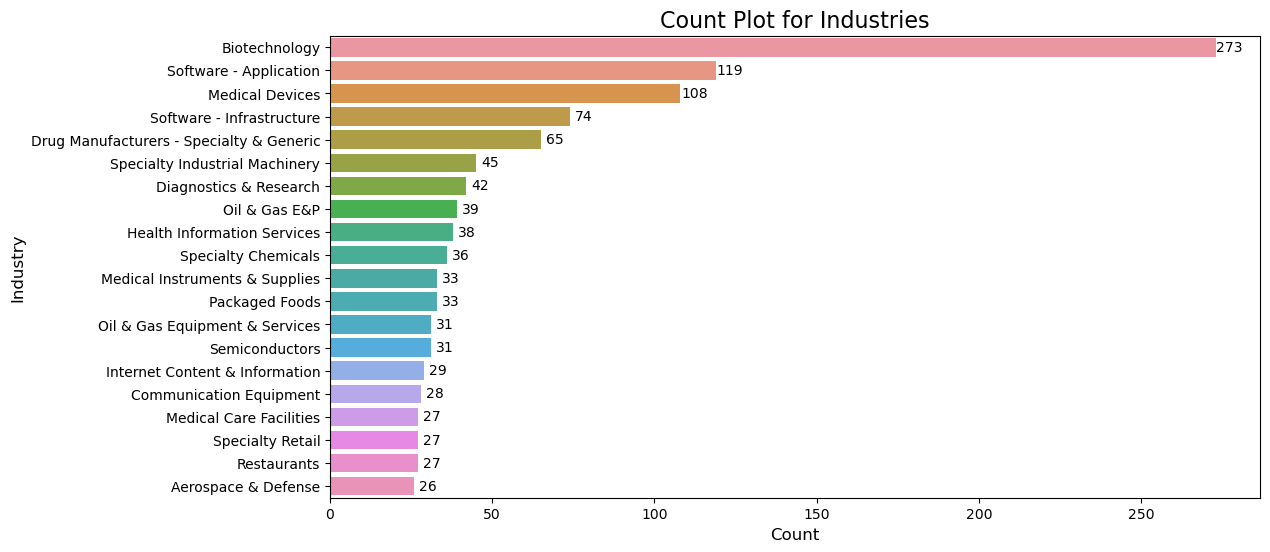

In [24]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(y='industry', data=data, order=data['industry'].value_counts().head(20).index)
plt.title('Count Plot for Industries', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Industry', fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                 (p.get_width(), p.get_y() + p.get_height() / 2), 
                 ha = 'center', va = 'center', 
                 xytext = (10, 0), 
                 textcoords = 'offset points')
plt.show()

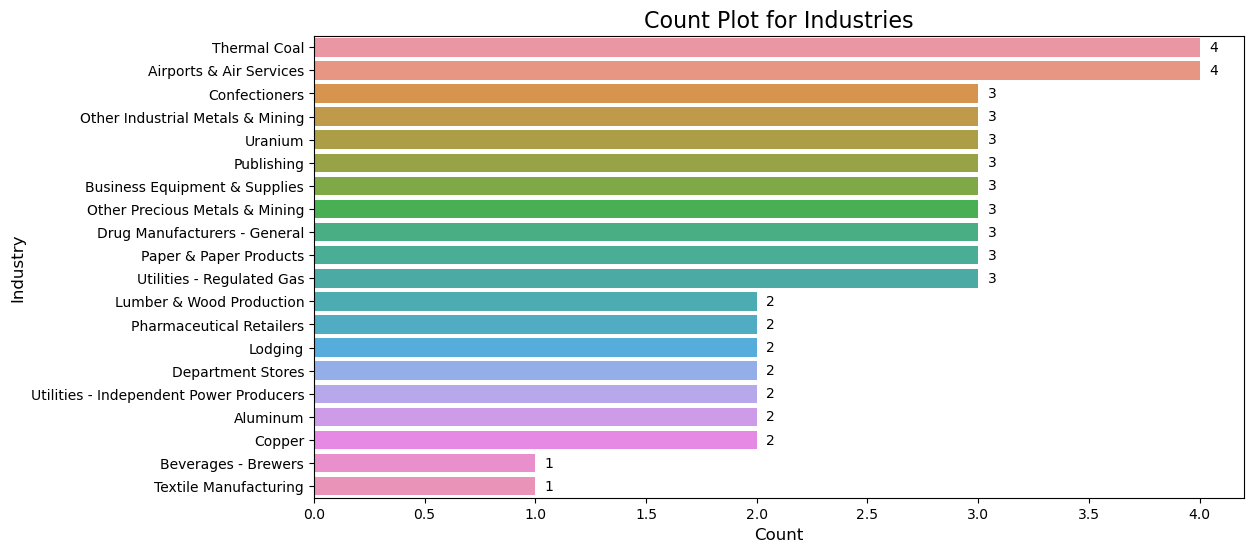

In [25]:
plt.figure(figsize=(12, 6))
ax=sns.countplot(y='industry', data=data, order=data['industry'].value_counts().tail(20).index)
plt.title('Count Plot for Industries', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Industry', fontsize=12)
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                 (p.get_width(), p.get_y() + p.get_height() / 2), 
                 ha = 'center', va = 'center', 
                 xytext = (10, 0), 
                 textcoords = 'offset points')
plt.show()

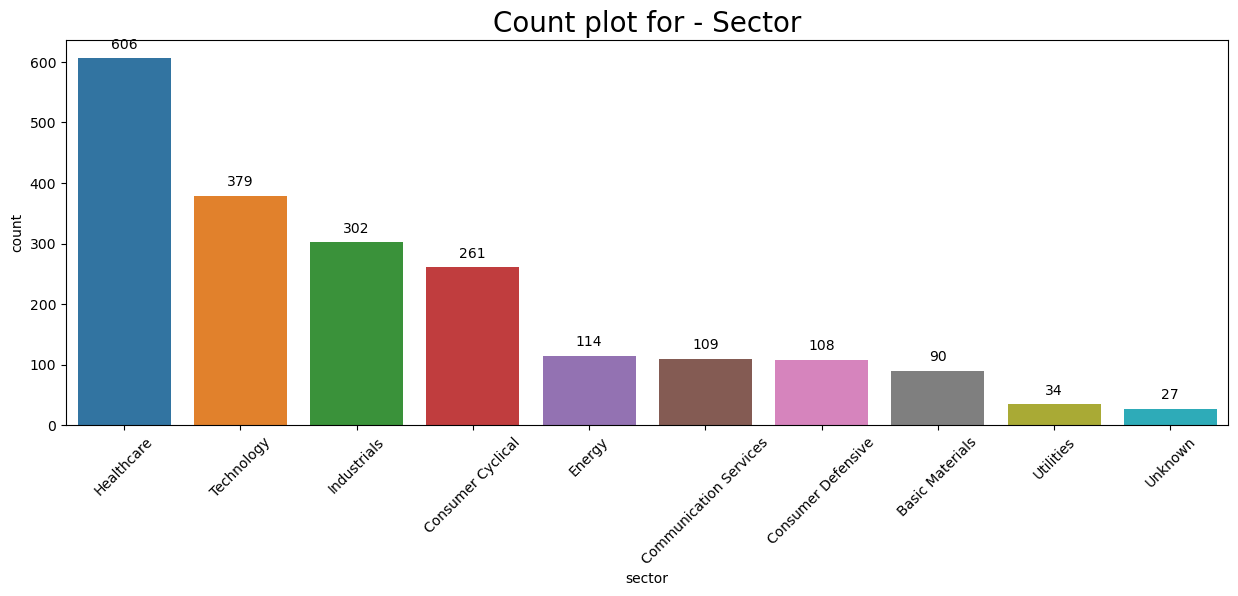

In [26]:
plt.figure(figsize=(15,5))
axs = sns.countplot(x=data['sector'], order=data['sector'].value_counts().index)
plt.title('Count plot for - Sector', fontsize=20)
plt.xticks(rotation=45)
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
plt.show()


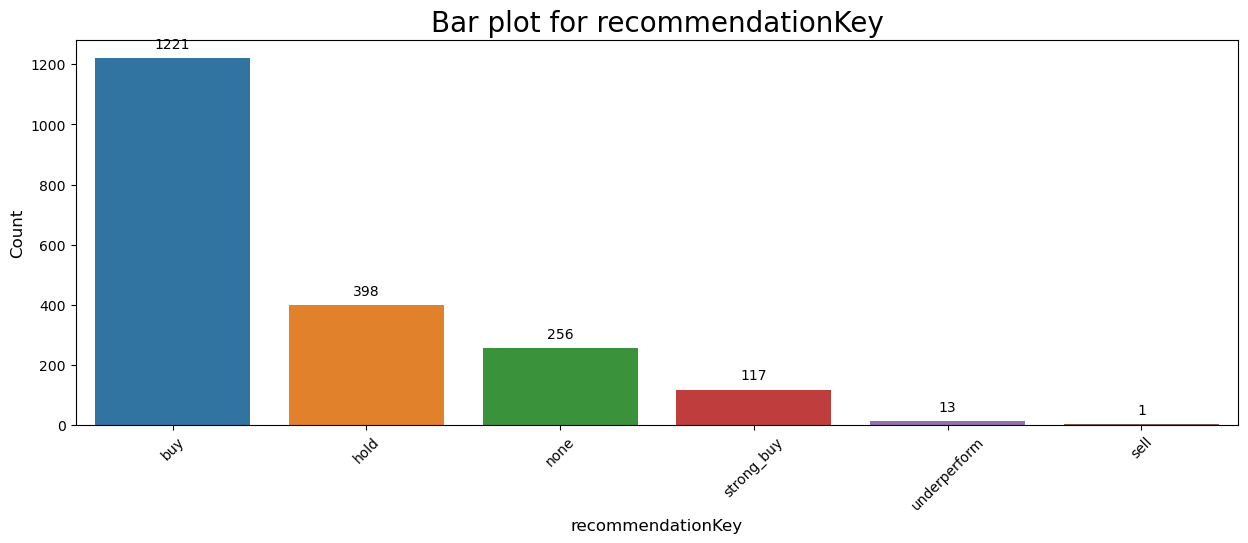

In [27]:
plt.figure(figsize=(15,5))
axs=sns.barplot(x=data['recommendationKey'].value_counts().index, y=data['recommendationKey'].value_counts())
plt.title('Bar plot for recommendationKey', fontsize=20)
plt.xlabel('recommendationKey', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
for p in axs.patches:
    axs.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
plt.show()


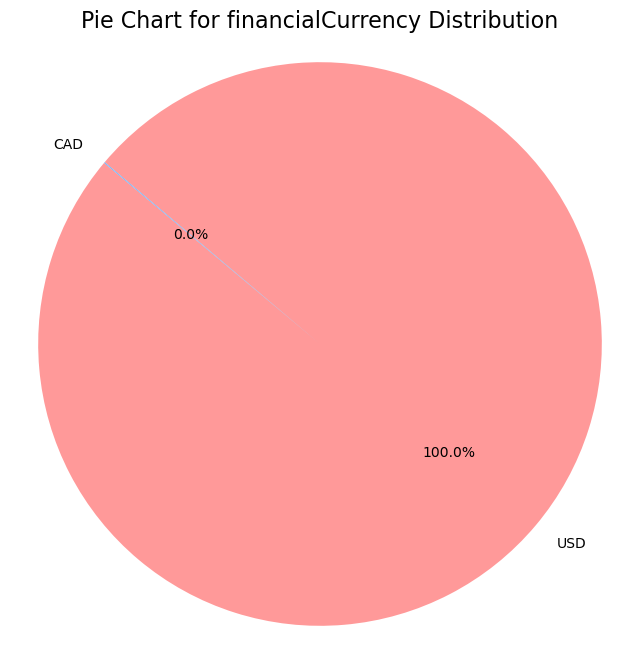

In [28]:
import matplotlib.pyplot as plt

# Light color palette
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

plt.figure(figsize=(8, 8))
plt.pie(data['financialCurrency'].value_counts(), labels=data['financialCurrency'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart for financialCurrency Distribution', fontsize=16)
plt.axis('equal')
plt.show()


In [29]:
data.describe(include='O')

,industry,sector,recommendationKey,financialCurrency
count,2003,2030,2006,2006
unique,113,10,6,2
top,Biotechnology,Healthcare,buy,USD
freq,273,606,1221,2005


In [30]:
data.drop(['financialCurrency'] ,axis=1 ,inplace=True)

In [31]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: x.fillna(x.mode()[0]))

In [32]:
data.select_dtypes(include='object').isna().sum()

industry             0
sector               0
recommendationKey    0
dtype: int64

In [33]:
# float_columns = data.select_dtypes(include='float').columns.tolist()

# # Print float columns and their lengths
# for col in float_columns:
#     print(f"Column: {col}, Length: {len(train_data[col])}")

In [34]:
data.select_dtypes(include='float').isna().any().sum()

195

In [35]:
data.select_dtypes(include='float').isna().sum()

fullTimeEmployees                    102
auditRisk                            625
boardRisk                            625
compensationRisk                     625
shareHolderRightsRisk                625
                                    ... 
Q10_OPERATING_INCOME                 267
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
Length: 207, dtype: int64

In [36]:
data.select_dtypes(include='float').isnull().sum()

fullTimeEmployees                    102
auditRisk                            625
boardRisk                            625
compensationRisk                     625
shareHolderRightsRisk                625
                                    ... 
Q10_OPERATING_INCOME                 267
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
Length: 207, dtype: int64

In [37]:
missing_percentage = lambda data: (data.select_dtypes(include='float').isna().sum() / len(data)) * 100
missing = missing_percentage(data).sort_values(ascending=False)

In [38]:
missing

trailingPE              55.12
auditRisk               30.79
boardRisk               30.79
compensationRisk        30.79
shareHolderRightsRisk   30.79
                         ... 
Q3_fiscal_year_end       0.00
Q4_fiscal_year_end       0.00
Q7_fiscal_year_end       0.00
Q5_fiscal_year_end       0.00
Q10_fiscal_year_end      0.00
Length: 207, dtype: float64

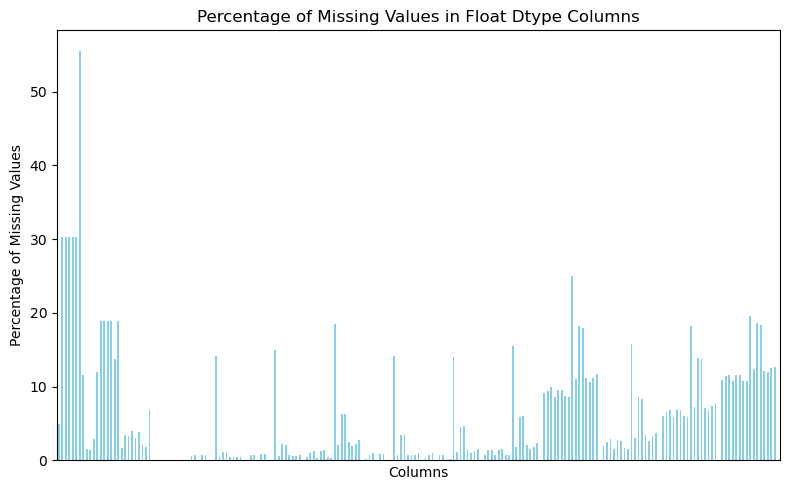

In [39]:
def plot_missing( missing_percentage):
    # Calculate percentage of missing values in float dtype columns
    float_columns = train_data.select_dtypes(include='float')
    missing_percentage = (float_columns.isna().sum() / len(train_data)) * 100

    # Plot a bar chart
    plt.figure(figsize=(8, 5))
    missing_percentage.plot(kind='bar', color='skyblue')
    plt.title('Percentage of Missing Values in Float Dtype Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right', ticks=[])
    plt.tight_layout()
    plt.show()
    
plot_missing(missing)

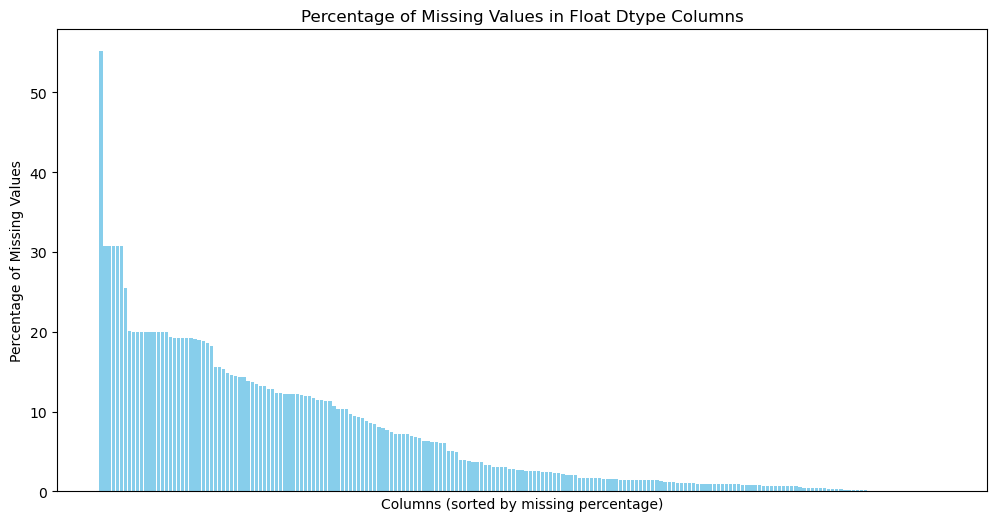

In [40]:
import matplotlib.pyplot as plt

# Calculate percentage of missing values in float dtype columns
float_columns = data.select_dtypes(include='float')
missing_percentage = (float_columns.isna().sum() / len(data)) * 100

# Sort columns by percentage of missing values
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(missing_percentage_sorted)), missing_percentage_sorted, color='skyblue')
plt.title('Percentage of Missing Values in Float Dtype Columns')
plt.xlabel('Columns (sorted by missing percentage)')
plt.ylabel('Percentage of Missing Values')
plt.xticks([], [])  # Remove x-axis labels
plt.show()


In [41]:
missing[missing>=30]

trailingPE              55.12
auditRisk               30.79
boardRisk               30.79
compensationRisk        30.79
shareHolderRightsRisk   30.79
overallRisk             30.79
dtype: float64

In [42]:
def edit_higher_missing(data, missing):
    na_30 = missing[missing>=30]
    for col in na_30.index:
        data[col+'_present'] = [True if not i else False for i in data[col].isna()]
    data.drop(columns=na_30.index, inplace=True)
    
    return data

In [43]:
data =  edit_higher_missing(data, missing)

In [44]:
data.head(1)

,Id,industry,sector,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_NET_INCOME,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_fiscal_year_end,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABI

In [45]:
data.select_dtypes(include='float').isnull().sum()

fullTimeEmployees                    102
forwardPE                            242
floatShares                           30
sharesOutstanding                     27
trailingEps                           58
                                    ... 
Q10_OPERATING_INCOME                 267
Q10_OPERATING_EXPENSES               261
Q10_EBITDA                           273
Q10_DEPRECIATION_AND_AMORTIZATION    279
Q10_fiscal_year_end                    0
Length: 201, dtype: int64

In [46]:
def plot_std(df):

    # Calculate standard deviation of all columns
    std_dev = df.select_dtypes(include='float').std()
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    bars = std_dev.plot(kind='bar', color='skyblue')

    # Remove labels on the bars
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, '', ha='center', va='bottom')

    plt.title('Standard Deviation of Columns')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation')
    plt.xticks(rotation=45, ha='right', ticks = [])
    plt.tight_layout()
    plt.show()
    

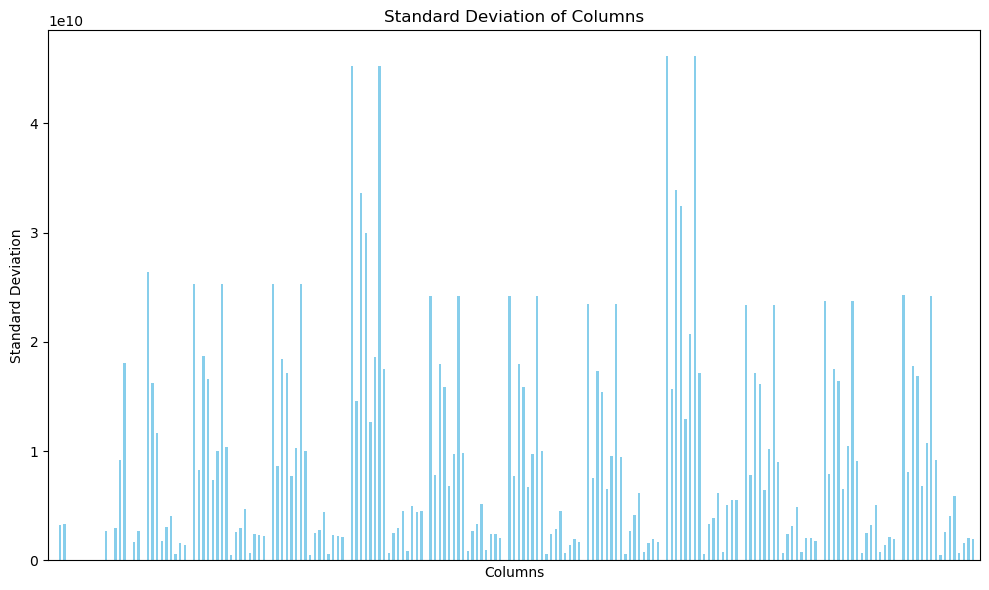

In [47]:
plot_std(data)

In [48]:
def plot_variance(df):
    plt.figure(figsize=(10, 6))
    variance = df.select_dtypes(include='float').var()
    variance.sort_values().plot(kind='bar', color='skyblue')
    plt.title('Variance of Numerical Features')
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.xticks(rotation=45, ha='right', ticks=[])
    plt.tight_layout()
    plt.show()

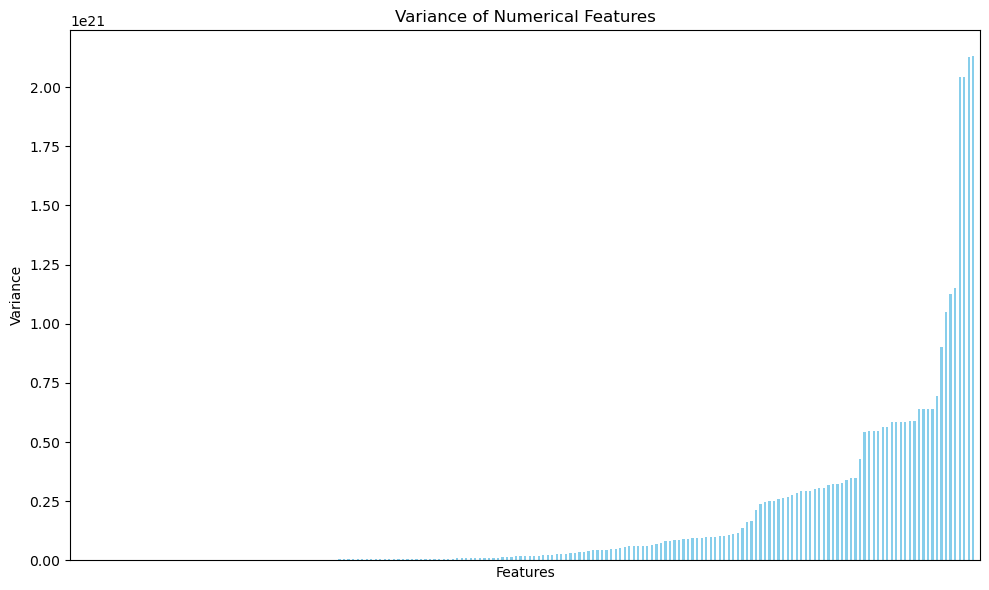

In [49]:
plot_variance(data)

In [50]:
def plot_missing_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.select_dtypes(include='float').isnull().head(10), cmap='viridis')
    plt.title('Missing Value Heatmap')
    plt.show()

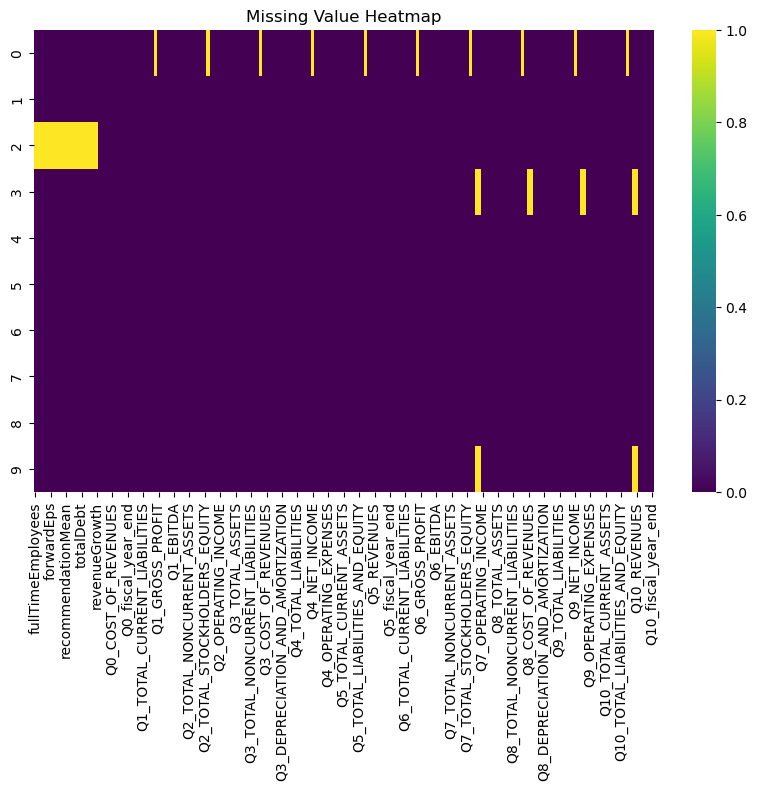

In [52]:
plot_missing_heatmap(data)

In [53]:
data.isnull().sum()

Id                                 0
industry                           0
sector                             0
fullTimeEmployees                102
forwardPE                        242
                                ... 
auditRisk_present                  0
boardRisk_present                  0
compensationRisk_present           0
shareHolderRightsRisk_present      0
overallRisk_present                0
Length: 212, dtype: int64

In [55]:
data = data.replace([float('inf'), float('-inf')],np.nan)

In [56]:
print('Missing data status:\n')

grater_than_20_percent = []
under_10_percent = 0
ten_to_20_percent = 0
twenty_to_50_percent = 0
over_50_percent = 0
for col in data.columns:
    if np.any(data[col].isnull()):
        percent_missing = np.round(100*data[col].isnull().sum()/len(data),2)
        if percent_missing < 10:
            under_10_percent+=1
        elif 10 <= percent_missing < 20:
            ten_to_20_percent+=1
        elif 20 <= percent_missing < 50:
            grater_than_20_percent.append(col)
            twenty_to_50_percent+=1
        else:
            grater_than_20_percent.append(col)
            over_50_percent+=1
        
print(f'ncols with under 10% missing data:\t{under_10_percent}')
print(f'ncols with 10-20% missing data:\t\t{ten_to_20_percent}')
print(f'ncols with 20-50% missing data:\t\t{twenty_to_50_percent}')
print(f'ncols with over 50% missing data:\t{over_50_percent}')

print(f"\n columns with more than 20% missing values are :\n {grater_than_20_percent}")

Missing data status:

ncols with under 10% missing data:	134
ncols with 10-20% missing data:		44
ncols with 20-50% missing data:		11
ncols with over 50% missing data:	0

 columns with more than 20% missing values are :
 ['Q0_TOTAL_ASSETS', 'Q0_TOTAL_LIABILITIES', 'Q0_TOTAL_STOCKHOLDERS_EQUITY', 'Q0_GROSS_PROFIT', 'Q0_COST_OF_REVENUES', 'Q0_REVENUES', 'Q0_OPERATING_INCOME', 'Q0_OPERATING_EXPENSES', 'Q0_EBITDA', 'Q7_NET_INCOME', 'Q10_NET_INCOME']


In [57]:
# Calculate percentage of missing values for each column
missing_percentage = (data.isnull().mean() * 100).round(2)

# Identify columns with missing values exceeding the threshold (20%)
columns_to_drop = missing_percentage[missing_percentage > 20].index.tolist()

# Drop columns with missing values exceeding the threshold
data = data.drop(columns=columns_to_drop)

In [58]:
for column in data.columns:
    if data[column].dtype =='float':
        data.loc[data[column].isnull(), column] = data[column].median()

In [59]:
data.isnull().sum()

Id                               0
industry                         0
sector                           0
fullTimeEmployees                0
forwardPE                        0
                                ..
auditRisk_present                0
boardRisk_present                0
compensationRisk_present         0
shareHolderRightsRisk_present    0
overallRisk_present              0
Length: 210, dtype: int64

In [187]:
# for column in data.columns:
#     if data[column].dtype = 'float':
     
#         #Q10_DEPRECIATION_AND_AMORTIZATION
#         Q1 = np.percentile(a=data[column] ,q=25 ,method="midpoint")
#         Q3 = np.percentile(a=data[column] ,q=75 ,method="midpoint")
#         IQR = Q3 - Q1

#         # upper and lower limit
#         Lower_limit = Q1 - (1.5 * IQR)
#         Upper_limit = Q3 + (1.5 * IQR)

#         # now replace outliers with median
#         data.loc[(data[column] > Upper_limit) | (data[column] < Lower_limit) , column] = data[column].median()

In [60]:
from scipy.stats import zscore

# Iterate through each column in the DataFrame
for column in data.columns:
    # Check if the dtype of the column is float
    if data[column].dtype == 'float':
        # Calculate z-scores for each data point in the column
        z_scores = zscore(data[column])
        
        # Identify outliers based on a threshold (e.g., z-score > 3 or < -3)
        outliers_mask = (z_scores > 3) | (z_scores < -3)
        
        # Replace outliers with NaN values
        data.loc[outliers_mask, column] = data[column].median()


In [61]:
data.head(1)

,Id,industry,sector,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_fiscal_year_end,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABILITIES,Q10_TOT

In [62]:
data.describe(include = 'bool')

,Train,trailingPE_present,auditRisk_present,boardRisk_present,compensationRisk_present,shareHolderRightsRisk_present,overallRisk_present
count,2030,2030,2030,2030,2030,2030,2030
unique,2,2,2,2,2,2,2
top,True,False,True,True,True,True,True
freq,1624,1119,1405,1405,1405,1405,1405


In [63]:
data.select_dtypes(include='O').nunique()

industry             113
sector                10
recommendationKey      6
dtype: int64

In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming data is your DataFrame and it contains the columns 'industry', 'sector', and 'recommendationKey'

# 1. Label Encoding for 'recommendationKey'
label_encoder = LabelEncoder()
data['recommendationKey_encoded'] = label_encoder.fit_transform(data['recommendationKey'])
data['industry_encoded'] = label_encoder.fit_transform(data['industry'])


# 2. One-Hot Encoding for 'sector'
sector_dummies = pd.get_dummies(data['sector'], prefix='sector')
data = pd.concat([data, sector_dummies], axis=1)

In [65]:
data.head(1)

,Id,industry,sector,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_fiscal_year_end,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABILITIES,Q10_TOT

In [66]:
data.shape

(2030, 222)

In [67]:
data.select_dtypes(include=['object'])

,industry,sector,recommendationKey
0,Personal Services,Consumer Cyclical,strong_buy
1,Building Products & Equipment,Industrials,buy
2,Biotechnology,Unknown,buy
3,Scientific & Technical Instruments,Technology,hold
4,Drug Manufacturers - Specialty & Generic,Healthcare,buy
...,...,...,...
2025,Packaged Foods,Consumer Defensive,hold
2026,Biotechnology,Unknown,buy
2027,Medical Devices,Healthcare,buy
2028,Drug Manufacturers - Specialty & Generic,Healthcare,buy


In [68]:
data1=data.select_dtypes(exclude=['object'])

In [69]:
data_variance = data1.var()

In [70]:
data_variance

Id                               343577.50
fullTimeEmployees             164746624.67
forwardPE                           949.21
floatShares          160845318531582848.00
sharesOutstanding    200038316752049536.00
                              ...         
sector_Healthcare                     0.21
sector_Industrials                    0.13
sector_Technology                     0.15
sector_Unknown                        0.01
sector_Utilities                      0.02
Length: 219, dtype: float64

In [71]:
data_variance[data_variance == 0]

Q0_fiscal_year_end    0.00
Q1_fiscal_year_end    0.00
Q2_fiscal_year_end    0.00
Q3_fiscal_year_end    0.00
Q4_fiscal_year_end    0.00
Q5_fiscal_year_end    0.00
Q6_fiscal_year_end    0.00
Q8_fiscal_year_end    0.00
Q9_fiscal_year_end    0.00
Q10_fiscal_year_end   0.00
dtype: float64

In [72]:
nonzero_variance_columns = data_variance[data_variance != 0].index
data_with_nonzero_variance = data1[nonzero_variance_columns]

In [73]:
data_with_nonzero_variance

,Id,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABILITIES,Q10_TOTAL_CURRENT_LIABILITIES,Q10_TOTAL_NONCURRENT_LIABILITIES,Q10_TOTAL_LIABILITIES_AND_EQUITY,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_

In [74]:
data1.corr()

,Id,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_fiscal_year_end,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABILITIES,Q10_TOTAL_CURRENT_LIABILITIES,Q10_TOTAL_N

In [75]:
# Calculate the correlation matrix for all numerical columns
correlation_matrix = data1.iloc[: ,:30].corr()

# Find pairs of features with correlation greater than or equal to 0.8
high_correlation_pairs = correlation_matrix[abs(correlation_matrix) >= 0.8].stack().reset_index()
high_correlation_pairs = high_correlation_pairs[high_correlation_pairs['level_0'] != high_correlation_pairs['level_1']]  # Exclude pairs of the same feature
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
print(high_correlation_pairs)


            Feature 1          Feature 2  Correlation
4         floatShares  sharesOutstanding         0.94
5   sharesOutstanding        floatShares         0.94
10    targetHighPrice     targetLowPrice         0.92
11    targetHighPrice    targetMeanPrice         0.97
12    targetHighPrice  targetMedianPrice         0.96
13     targetLowPrice    targetHighPrice         0.92
15     targetLowPrice    targetMeanPrice         0.95
16     targetLowPrice  targetMedianPrice         0.95
17    targetMeanPrice    targetHighPrice         0.97
18    targetMeanPrice     targetLowPrice         0.95
20    targetMeanPrice  targetMedianPrice         0.98
21  targetMedianPrice    targetHighPrice         0.96
22  targetMedianPrice     targetLowPrice         0.95
23  targetMedianPrice    targetMeanPrice         0.98


<Axes: >

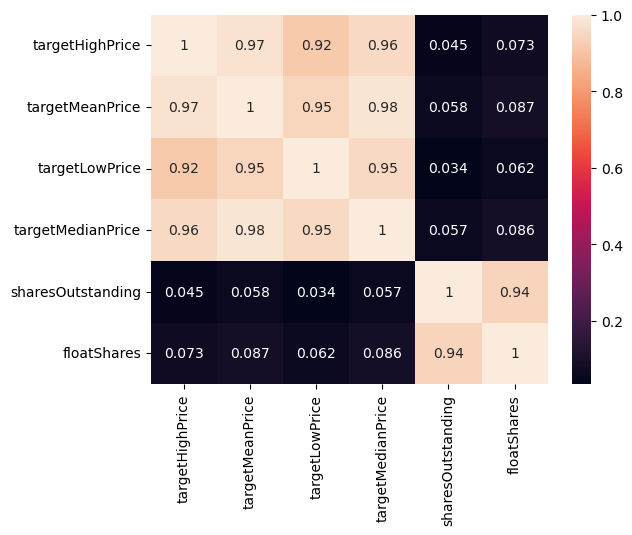

In [76]:
sns.heatmap(data[['targetHighPrice' ,'targetMeanPrice' ,'targetLowPrice' ,'targetMedianPrice','sharesOutstanding','floatShares']].corr() ,annot=True)

In [77]:
# Calculate the correlation matrix for all numerical columns
# cov_matrix = data1.iloc[: ,:30].cov()
float_data = data1.select_dtypes(include='float')

# Calculate the covariance matrix for float columns
cov_matrix = float_data.iloc[: ,:30].cov()
# Find pairs of features with correlation greater than or equal to 0.8
high_cov_pairs = cov_matrix[(abs(cov_matrix) >= 0.8) & (cov_matrix < 1)].stack().reset_index()
high_cov_pairs = high_cov_pairs[high_cov_pairs['level_0'] != high_cov_pairs['level_1']]  # Exclude pairs of the same feature
high_cov_pairs.columns = ['Feature 1', 'Feature 2', 'Covariance']
high_cov_pairs['Absolute Covariance'] = abs(high_cov_pairs['Covariance'])
high_cov_pairs_sorted = high_cov_pairs.sort_values(by='Absolute Covariance', ascending=False)
top_high_covariance = high_cov_pairs_sorted.head(20) 

In [78]:
# Remove pairs where Feature 1 is the same as Feature 2 but in reverse order
unique_pairs = []
dropped_indices = []

for index, row in high_cov_pairs.iterrows():
    feature1 = row['Feature 1']
    feature2 = row['Feature 2']
    rev_pair = (feature2, feature1)
    
    if (feature1, feature2) not in unique_pairs and rev_pair not in unique_pairs:
        unique_pairs.append((feature1, feature2))
    else:
        dropped_indices.append(index)

# Drop rows with indices in dropped_indices
filtered_high_cov_pairs = high_cov_pairs.drop(index=dropped_indices)

# print(filtered_high_cov_pairs)


In [79]:
feature_counts = pd.concat([high_cov_pairs['Feature 1'], high_cov_pairs['Feature 2']]).value_counts()

# Extract the top five most common feature names
top_five_common_features = feature_counts.head(7)

print(top_five_common_features)

revenueGrowth         52
recommendationMean    10
sharesOutstanding      6
targetLowPrice         4
revenuePerShare        4
targetMeanPrice        4
Q0_EBITDA              4
Name: count, dtype: int64


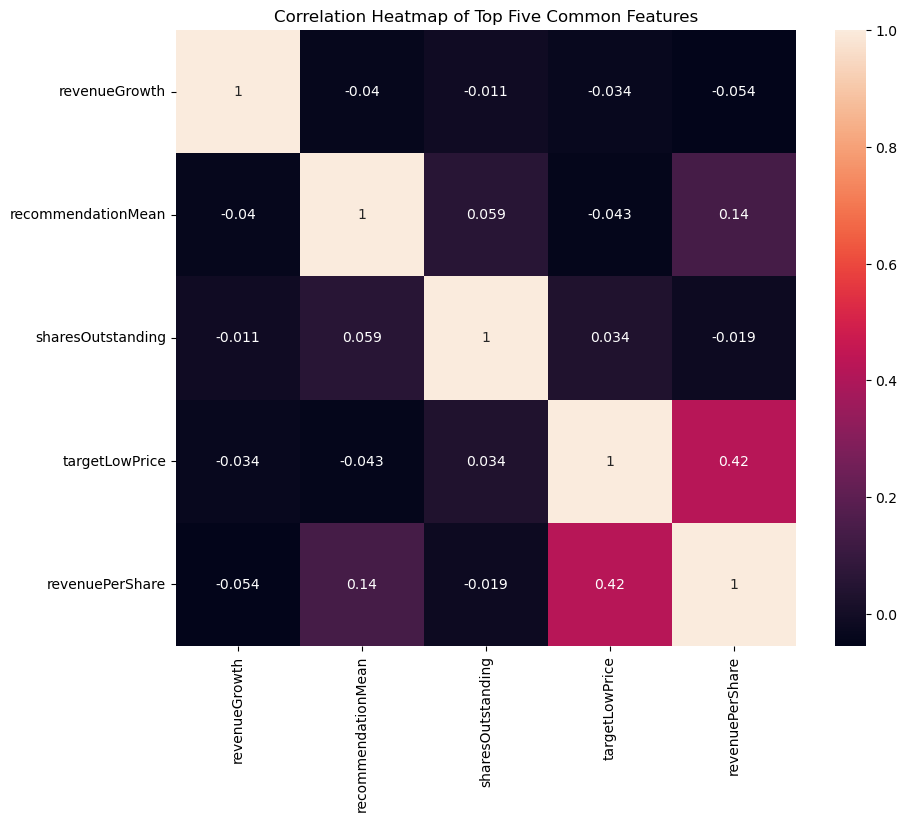

In [80]:
# Extract the top five most common feature names as a list
top_five_common_features = feature_counts.head(5).index.tolist()

# Create a subset of the data with only the top five common features
subset_data = data[top_five_common_features]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_data.corr(), annot=True)
plt.title('Correlation Heatmap of Top Five Common Features')
plt.show()


In [81]:
correlation_matrix = data1.corr()

# Iterate over each pair of features in the correlation matrix
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i+1, len(correlation_matrix.columns)):
#         if abs(correlation_matrix.iloc[i, j]) >= 0.8:
#             # If correlation is greater than or equal to 0.8, add the column names to the list
# #             print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")

In [82]:
high_corr_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]) for i in range(len(correlation_matrix.columns)) for j in range(i+1, len(correlation_matrix.columns)) if correlation_matrix.iloc[i, j] ==1]

# Sort the pairs by correlation value in descending order
high_corr_pairs.sort(key=lambda x: x[2], reverse=True)

# Print the top 10 highly correlated pairs along with their correlation values
print("Highly Correlated Pairs:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]}")

Highly Correlated Pairs:
auditRisk_present - boardRisk_present: 1.0
auditRisk_present - compensationRisk_present: 1.0
auditRisk_present - shareHolderRightsRisk_present: 1.0
auditRisk_present - overallRisk_present: 1.0
boardRisk_present - compensationRisk_present: 1.0
boardRisk_present - shareHolderRightsRisk_present: 1.0
boardRisk_present - overallRisk_present: 1.0
compensationRisk_present - shareHolderRightsRisk_present: 1.0
compensationRisk_present - overallRisk_present: 1.0
shareHolderRightsRisk_present - overallRisk_present: 1.0


In [83]:
# Extract the column names to delete
columns_to_delete = set()
for pair in high_corr_pairs:
    columns_to_delete.add(pair[1])  # Adding the second column of each pair to the set

# Confirm deletion
print("Columns Deleted:", len(columns_to_delete))
print(columns_to_delete)


Columns Deleted: 4
{'compensationRisk_present', 'shareHolderRightsRisk_present', 'overallRisk_present', 'boardRisk_present'}


In [84]:

# Delete the columns from the DataFrame
data1.drop(columns=columns_to_delete, inplace=True)

In [85]:
data1.shape

(2030, 215)

In [86]:
# separate test_data

test_data = data1[data1['Train'] == False]                    # first identify rows where "is_train"==False for test data
test_data.drop('Train', axis = 1, inplace=True)     # now drop the "is_train" and "id" column
test_data.drop(target_variables, axis = 1, inplace = True)        # from test_data drop all target_names
test_data.reset_index(drop = True, inplace = True)             # reset test_data's index
print(f"Test Data Shape : {test_data.shape}")

Test Data Shape : (406, 205)


C:\Users\gcv\AppData\Local\Temp\ipykernel_22504\1434318268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Train', axis = 1, inplace=True)     # now drop the "is_train" and "id" column
C:\Users\gcv\AppData\Local\Temp\ipykernel_22504\1434318268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(target_variables, axis = 1, inplace = True)        # from test_data drop all target_names


In [87]:
# separate train_data

train_data = data1[data1['Train'] == True]                    # first identify rows where "is_train"==True for test data
train_data.drop('Train', axis = 1, inplace=True)    # now drop the "is_train" and "id" column
train_data.drop(target_variables, axis = 1, inplace = True)       # drop all target_names
print(f"Train Data Shape : {train_data.shape}")

Train Data Shape : (1624, 205)


C:\Users\gcv\AppData\Local\Temp\ipykernel_22504\1029499964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Train', axis = 1, inplace=True)    # now drop the "is_train" and "id" column
C:\Users\gcv\AppData\Local\Temp\ipykernel_22504\1029499964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(target_variables, axis = 1, inplace = True)       # drop all target_names


In [88]:
# separate target variables

target_data = data1[data1['Train'] == True]                    # first identify rows where "is_train"==True for test data
target_data = target_data[target_variables].copy()

print(f"Target data shape : {target_data.shape}")

Target data shape : (1624, 9)


In [89]:
problematic_cols = train_data.columns[train_data.isin([np.inf, -np.inf, np.nan]).any()].tolist()

# Print problematic columns
print("Columns with infinite or extremely large values:", problematic_cols)

Columns with infinite or extremely large values: []


In [90]:
train_data = train_data.replace([np.inf, -np.inf], 0)
# train_data = train_data.dropna(subset=problematic_cols)

In [91]:
train_data.shape

(1624, 205)

In [92]:
train_data.isna().sum()

Id                    0
fullTimeEmployees     0
forwardPE             0
floatShares           0
sharesOutstanding     0
                     ..
sector_Healthcare     0
sector_Industrials    0
sector_Technology     0
sector_Unknown        0
sector_Utilities      0
Length: 205, dtype: int64

In [93]:
test_data.shape

(406, 205)

In [318]:
test_data.isnull().sum()

Id                    0
fullTimeEmployees     0
forwardPE             0
floatShares           0
sharesOutstanding     0
                     ..
sector_Healthcare     0
sector_Industrials    0
sector_Technology     0
sector_Unknown        0
sector_Utilities      0
Length: 205, dtype: int64

In [320]:
target_data.isnull().sum()

Q0_TOTAL_ASSETS                 0
Q0_TOTAL_LIABILITIES            0
Q0_TOTAL_STOCKHOLDERS_EQUITY    0
Q0_GROSS_PROFIT                 0
Q0_COST_OF_REVENUES             0
Q0_REVENUES                     0
Q0_OPERATING_INCOME             0
Q0_OPERATING_EXPENSES           0
Q0_EBITDA                       0
dtype: int64

In [94]:
train_data.head(1)

,Id,fullTimeEmployees,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_fiscal_year_end,Q10_TOTAL_ASSETS,Q10_TOTAL_CURRENT_ASSETS,Q10_TOTAL_NONCURRENT_ASSETS,Q10_TOTAL_LIABILITIES,Q10_TOTAL_CURRENT_LIABILITIES,Q10_TOTAL_NONCURRENT_LIABILITIES,Q10_TOTAL_LIABILITIES_AND_EQUITY,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERA

In [332]:
# Print the results
print("R-squared scores for Regression Models:")
for target, model_scores in results.items():
    print(f"Target Variable: {target}")
    for model, score in model_scores.items():
        print(f"{model}: {' '*(30-len(model))}{score:.2f}")
    print()


R-squared scores for Regression Models:
Target Variable: Q0_TOTAL_ASSETS
Linear Regression:              -0.12
Ridge Regression:               -0.12
Lasso Regression:               0.48
ElasticNet Regression:          0.48
Bayesian Ridge Regression:      0.02
Huber Regressor:                0.62
KNeighbors Regressor:           0.75
Decision Tree Regressor:        0.75
Random Forest Regressor:        0.73
Gradient Boosting Regressor:    0.84
AdaBoost Regressor:             0.69
Extra Trees Regressor:          0.76
Support Vector Regressor:       -0.07
XGBoost Regressor:              0.78
LightGBM Regressor:             0.75
CatBoost Regressor:             0.72

Target Variable: Q0_TOTAL_LIABILITIES
Linear Regression:              -0.27
Ridge Regression:               -0.27
Lasso Regression:               0.72
ElasticNet Regression:          0.73
Bayesian Ridge Regression:      -0.07
Huber Regressor:                0.70
KNeighbors Regressor:           0.48
Decision Tree Regressor:       

In [95]:
target_variables

['Q0_TOTAL_ASSETS',
 'Q0_TOTAL_LIABILITIES',
 'Q0_TOTAL_STOCKHOLDERS_EQUITY',
 'Q0_GROSS_PROFIT',
 'Q0_COST_OF_REVENUES',
 'Q0_REVENUES',
 'Q0_OPERATING_INCOME',
 'Q0_OPERATING_EXPENSES',
 'Q0_EBITDA']

In [96]:
target_data

,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,1192950000.00,1055816000.00,137134000.00,25598000.00,61899000.00,42992000.00,15222000.00,10383000.00,15215000.00
1,1219954000.00,835046000.00,384908000.00,111786000.00,217796000.00,329582000.00,28908000.00,85522000.00,26264000.00
2,631705500.00,-37972000000.00,247001000.00,-435000000.00,4445000000.00,4010000000.00,-1472000000.00,219000000.00,-654000000.00
3,83298000.00,16040000.00,-31633000.00,494000.00,3339000.00,3833000.00,-12348000.00,12842000.00,-12348000.00
4,148546000.00,56555000.00,91991000.00,1761000.00,-2375000.00,-614000.00,-10098000.00,11859000.00,-10098000.00
...,...,...,...,...,...,...,...,...,...
1619,353960000.00,199759000.00,154201000.00,48741000.00,45693000.00,94434000.00,2616000.00,46125000.00,2616000.00
1620,106153000.00,39493000.00,68117000.00,1077000.00,169000.00,1246000.00,-6705000.00,7782000.00,-6705000.00
1621,520315000.00,380796000.00,323308039.14,27808000.00,112384000.00,140192000.00,7061000.00,9417000.00,18391000.00
1622,199721000.00,26921000.00,172800000.00,0.00,0.00,0.00,-33919000.00,33919000.00,-33919000.00


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming train_data, test_data, target_data are your datasets

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'Orthogonal Matching Pursuit Regression': OrthogonalMatchingPursuit(),
    'Huber Regression': HuberRegressor(),
    'SVR': SVR(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Extra Trees Regression': ExtraTreesRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'AdaBoost Regression': AdaBoostRegressor(),
    'Bagging Regression': BaggingRegressor(),
    'XGBoost Regression': XGBRegressor(),
    'LightGBM Regression': LGBMRegressor(),
    'CatBoost Regression': CatBoostRegressor(verbose=0),
    'Multi-layer Perceptron Regression': MLPRegressor(),
    'Gaussian Process Regression': GaussianProcessRegressor(),
    'KNN Regression': KNeighborsRegressor()
}

best_models = {}
best_r2_scores = {}
evaluation_metrics = {metric: {} for metric in ['R2', 'MAE', 'MSE', 'RMSE']}

for target_feature in target_data.columns:  # Assuming target_data is a DataFrame
    X_train, X_test, y_train, y_test = train_test_split(train_data, target_data[target_feature], test_size=0.2, random_state=42)
    
    max_r2_score = -1
    best_model = None
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        
        # Mean Absolute Error
        mae = mean_absolute_error(y_test, y_pred)
        
        # Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        
        # Root Mean Squared Error
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        
        evaluation_metrics['R2'][model_name] = r2
        evaluation_metrics['MAE'][model_name] = mae
        evaluation_metrics['MSE'][model_name] = mse
        evaluation_metrics['RMSE'][model_name] = rmse
        
        if r2 > max_r2_score:
            max_r2_score = r2
            best_model = model_name
            
    best_models[target_feature] = best_model
    best_r2_scores[target_feature] = max_r2_score

# Print evaluation metrics for each model
for metric in evaluation_metrics.keys():
    print(f"-------- {metric} --------")
    for model_name, value in evaluation_metrics[metric].items():
        print(f"{model_name}: {value}")

# Now best_models will contain the best model for each target feature
# You can use ensemble modeling with these best models
# For simplicity, let's assume we are using a simple averaging ensemble
ensemble_predictions = {}
for target_feature, best_model_name in best_models.items():
    model = models[best_model_name]
    model.fit(train_data, target_data[target_feature])
    ensemble_predictions[target_feature] = model.predict(test_data)

# ensemble_predictions will contain the predictions for each target feature using ensemble modeling


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.26698e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 3430083731.266359


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 1812877215.113453


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 1351065259.811457


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 230730726.067744


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 346569485.254042


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 587268711.873749


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 44007130.871440


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 224131299.403387


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44502
[LightGBM] [Info] Number of data points in the train set: 1299, number of used features: 194
[LightGBM] [Info] Start training from score 37493523.030793


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

-------- R2 --------
Linear Regression: -5.623973199857751
Ridge Regression: -5.571238571866943
Lasso Regression: -1.161010750434286
ElasticNet Regression: -1.1106759144054452
Bayesian Ridge Regression: -10.057293883854772
Orthogonal Matching Pursuit Regression: 0.14467332516745934
Huber Regression: 0.46837663271652885
SVR: -0.022252584265572084
Decision Tree Regression: 0.5602766138826649
Random Forest Regression: 0.7079960750956833
Extra Trees Regression: 0.6822817365667926
Gradient Boosting Regression: 0.7175497705637197
AdaBoost Regression: 0.635540263826663
Bagging Regression: 0.6415281607665976
XGBoost Regression: 0.7077866399929675
LightGBM Regression: 0.7874948687304905
CatBoost Regression: 0.7195265882489308
Multi-layer Perceptron Regression: -6.311380808816567
Gaussian Process Regression: -0.02171751786557219
KNN Regression: 0.22395673171203712
-------- MAE --------
Linear Regression: 200849574.29063955
Ridge Regression: 200509840.2004454
Lasso Regression: 133959809.49636959


C:\Users\gcv\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+20, tolerance: 2.110e+18
  model = cd_fast.enet_coordinate_descent(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45010
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 195
[LightGBM] [Info] Start training from score 351121330.429803
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 45010
[LightGBM] [Info] Number of data points in the train set: 1624, number of used features: 195
[LightGBM] [Info] Start training from score 41431339.067734


In [118]:
import pandas as pd

# Initialize an empty dictionary to store the evaluation metrics
metrics_dict = {}

# Loop over each metric in evaluation_metrics
for metric, model_scores in evaluation_metrics.items():
    # Loop over each model and its corresponding score for the current metric
    for model_name, value in model_scores.items():
        # Clip the R2 score to the range [0, 1]
        if metric == 'R2':
            value = max(0, min(1, value))
        # Check if the model_name key already exists in the dictionary
        if model_name in metrics_dict:
            # If the model_name key exists, append the metric and its value to the list
            metrics_dict[model_name][metric] = value
        else:
            # If the model_name key does not exist, create a new entry with the metric and its value
            metrics_dict[model_name] = {metric: value}

# Convert the dictionary into a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_dict, orient='index')

# Print the DataFram


In [119]:
metrics_df

,R2,MAE,MSE,RMSE
Linear Regression,0.00,200849574.29,996901300150787072.00,998449447.97
Ridge Regression,0.00,200509840.20,988964791710787072.00,994467089.31
Lasso Regression,0.00,133959809.50,325229943079182592.00,570289350.31
ElasticNet Regression,0.00,132182686.41,317654600914285888.00,563608552.91
Bayesian Ridge Regression,0.00,200973577.26,1664111601357458176.00,1290004496.64
Orthogonal Matching Pursuit Regression,0.14,112889095.46,128725803753632384.00,358783784.13
Huber Regression,0.47,83065997.24,80008781745495728.00,282858236.13
SVR,0.00,147661364.28,153847985127526720.00,392234604.70
Decision Tree Regression,0.56,71734893.44,66177927068982032.00,257250708.59
Random Forest Regression,0.71,55344815.11,43946296822652816.00,209633720.62


In [122]:
for metric, model_scores in evaluation_metrics.items():
    print(f"Metric: {metric}")
    print(model_scores)


Metric: R2
{'Linear Regression': -5.623973199857751, 'Ridge Regression': -5.571238571866943, 'Lasso Regression': -1.161010750434286, 'ElasticNet Regression': -1.1106759144054452, 'Bayesian Ridge Regression': -10.057293883854772, 'Orthogonal Matching Pursuit Regression': 0.14467332516745934, 'Huber Regression': 0.46837663271652885, 'SVR': -0.022252584265572084, 'Decision Tree Regression': 0.5602766138826649, 'Random Forest Regression': 0.7079960750956833, 'Extra Trees Regression': 0.6822817365667926, 'Gradient Boosting Regression': 0.7175497705637197, 'AdaBoost Regression': 0.635540263826663, 'Bagging Regression': 0.6415281607665976, 'XGBoost Regression': 0.7077866399929675, 'LightGBM Regression': 0.7874948687304905, 'CatBoost Regression': 0.7195265882489308, 'Multi-layer Perceptron Regression': -6.311380808816567, 'Gaussian Process Regression': -0.02171751786557219, 'KNN Regression': 0.22395673171203712}
Metric: MAE
{'Linear Regression': 200849574.29063955, 'Ridge Regression': 20050984

In [103]:
import pandas as pd

# Assuming test_data has an 'id' column
test_ids = test_data['Id']

# Create a DataFrame to store ensemble predictions
ensemble_df = pd.DataFrame({'Id': test_ids})

# Add ensemble predictions for each target feature to the DataFrame
for target_feature, predictions in ensemble_predictions.items():
    ensemble_df[target_feature] = predictions


In [104]:
ensemble_df

,Id,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,480,118804077.66,5345702.30,1479528.36,-5413.36,-437473.99,-1585637.16,-694114.20,488264.35,6757423.59
1,573,3862402024.89,1436120296.10,841510480.89,225826170.00,361269032.17,638459864.94,52784000.00,102655499.58,127010687.23
2,1967,-7489447.94,7987380.10,10087060.59,1153714.65,11103782.56,3113042.38,-3867718.70,1478165.94,-3231346.84
3,57,5643644609.55,2656658428.47,2529186222.61,167888932.66,289568136.81,445466789.36,86082300.00,81357520.00,103197194.44
4,131,4411647505.11,3149864592.66,1029335375.15,218538422.66,786556857.02,1032448898.40,114616800.00,82110600.00,114544382.26
...,...,...,...,...,...,...,...,...,...,...
401,885,13015811664.66,8355436341.65,4954348500.29,631787560.00,1096771926.60,1558614567.97,212373300.00,358809730.00,229975176.31
402,385,2153868325.86,1870972000.00,186653980.94,-5214000.00,184178062.41,301486435.24,-103708000.00,98494000.00,-103120741.44
403,711,72273066.47,57716786.20,85985320.76,9930146.06,3398215.38,14889310.34,-9445211.00,20050942.96,-9646117.85
404,272,449878123.30,179232800.00,307756249.70,94049510.00,31832575.58,108558159.99,3489900.00,81579180.00,4806869.96


In [123]:
## Now Create a Submitted.csv file

ensemble_df.to_csv("submission.csv" ,index=False)

In [124]:
pd.read_csv('submission.csv')

,Id,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA
0,480,118804077.66,5345702.30,1479528.36,-5413.36,-437473.99,-1585637.16,-694114.20,488264.35,6757423.59
1,573,3862402024.89,1436120296.10,841510480.89,225826170.00,361269032.17,638459864.94,52784000.00,102655499.58,127010687.23
2,1967,-7489447.94,7987380.10,10087060.59,1153714.65,11103782.56,3113042.38,-3867718.70,1478165.94,-3231346.84
3,57,5643644609.55,2656658428.47,2529186222.61,167888932.66,289568136.81,445466789.36,86082300.00,81357520.00,103197194.44
4,131,4411647505.11,3149864592.66,1029335375.15,218538422.66,786556857.02,1032448898.40,114616800.00,82110600.00,114544382.26
...,...,...,...,...,...,...,...,...,...,...
401,885,13015811664.66,8355436341.65,4954348500.29,631787560.00,1096771926.60,1558614567.97,212373300.00,358809730.00,229975176.31
402,385,2153868325.86,1870972000.00,186653980.94,-5214000.00,184178062.41,301486435.24,-103708000.00,98494000.00,-103120741.44
403,711,72273066.47,57716786.20,85985320.76,9930146.06,3398215.38,14889310.34,-9445211.00,20050942.96,-9646117.85
404,272,449878123.30,179232800.00,307756249.70,94049510.00,31832575.58,108558159.99,3489900.00,81579180.00,4806869.96
